---
layout: post
title:  "Perceptron"
date:   2021-08-06 3:14:54 +0700
categories: DeepLearning
---

# TOC

- [Definition](#define)
- [Loss function](#loss)
- [Stochastic gradient descent](#sgrad)
- [Neural network](#nn)
- [Code example](#code)

# Definition <a name="define"></a>

Remember, from the linear function that takes linear combinations of parameters $$ \theta $$ and input x:

$$ \hat{y}=h_{\theta}(x) = \theta \cdot x $$

Instead of the logistic function, we use a step function (with threshold) to wrap around that linear combination to have a new hypothesis function h:

$$ h_{\theta}(x)=step(\theta^{\top} x) = 
\begin{cases}
      1 & \text{if $z$ < 0}\\
      2 & \text{if $z$ >= 0}\\
\end{cases}
$$


Sometimes we use a sign function. A sign function is similar to a step function, it also use 0 as a threshold:

$$ sgn(z) =
\begin{cases}
      -1 & \text{if $z$ < 0}\\
      0 & \text{if $z$ = 0}\\
      1 & \text{if $z$ > 0}
\end{cases}
$$

Because of its step (and sign) function, this architecture is called a threshold logic unit. It is also the simplest artificial neural network architecture. Due to the nature of its output, this architecture can do classification, starting from a binary one.

# Loss function <a name="loss"></a>

Assume that the binary classification problem has a linear solution: the plane of inputs is linearly separable. One of the ways to go about this is to define a loss function that simply counts the number of misclassified points:

$$ L(\theta) = \sum_{x}(-y_{i} . sgn(\theta^{\top}x_{i})) = \sum_{x}(-y_{i} .sgn(\hat{y})) $$

X is the number of misclassified points. You can see that when x is misclassified, $$ y_{i} \neq \hat{y} $$ hence $$ -y_{i} . \hat{y} = 1 $$. When $$ L(\theta) = 0 $$ there is none misclassified. A downside of this simple loss function is that it is hard to imagine its derivative. Thinking in a similar vein, we try another loss function:

$$ L(\theta) = \sum_{x}(-y_{i} . \hat{y}) = \sum_{x}(-y_{i} \theta^{\top} x_{i}) $$

This is without the sign function. One thing about this multiplication loss function is that it heavily penalizes the misclassified points that are far from the decision line. In the previous loss function with the sign function, all misclassified points are penalized the same amount. 

# Stochastic gradient descent <a name="sgrad"></a>

We calculate the loss function for a single point of data, since it is how stochastic gradient descent is done:


$$ L(\theta;x_{i};y_{i}) = -y_{i} \theta^{\top} x_{i} $$ 


The derivative:


$$ \frac{\partial}{\partial \theta} L(\theta;x_{i};y_{i})= - y_{i} x_{i} $$


From there, let’s start the approximating process. Firstly, initialize a random parameter vector $$ \theta $$ . Choose one random instance (point) $$ x_{i} $$. If the point is classified correctly already, i.e. $$ sgn(\theta^{\top}x_{i}) = y_{i} $$, we don’t need to do anything. However, in this random scanning step, if the point $$ x_{i} $$ is misclassified, we will adjust the parameter vector $$ \theta $$ by the update rule:

$$ \theta \leftarrow \theta + \alpha y_{i} x_{i} $$

As we can see, with this update rule, we multiply the point with its label which means the algorithm would make a shift toward the correct parameter faster if the point is discovered to be farther from the decision line. After deciding the fate of that one point, we continue to search for misclassified points, if there is none, then we stop the algorithm. If we discover a misclassified point, come back to the part of adjusting the parameter vector  with the equation above.

The above update rule is for the sgn function. Following is the update rule for the step function. The same logic applies: when the prediction is incorrect, go and strengthen the connection (parameter) that could have made the correct prediction. In other famous words “Cells that fire together, are wired together”. This is an analogy to biology since these are similar to the biological neurons in the sense that when one neuron triggers another neuron often, the connection between them grows strong and they are considered to be in a group (or a net/network). Here is the update rule:

$$ \theta_{j} \leftarrow \theta_{j} + \alpha (y_{j} -\hat{y_{j}}) x_{i} $$

As you can see this is similar to linear regression, but the meaning is very different, since the domain of y in the classification problem is structurally different from the R-valued domain of y in linear regression. Perceptron’s domain is also different from the logistic regression output domain. 

# Neural network <a name='nn'></a>

Please have a look at the historical perceptron, inspired by biology, from the famous paper of Frank Rosenblatt (1958)

<img width="628" alt="perceptron" src="https://user-images.githubusercontent.com/7457301/223474372-122bb291-9018-46d7-b59e-45a152933b7c.png">

<p style="font-size:9px">Source: Frank Rosenblatt, 1958</p>

The following picture shows the perceptron of today, as a threshold logic unit:

<img width="668" alt="Screen Shot 2023-03-06 at 10 16 58" src="https://user-images.githubusercontent.com/7457301/223474398-4e63e3f1-d58b-4d85-a2fc-beed02cd882c.png">


<p style="font-size:9px">Source: Handson Machine Learning, O’Reilly</p>

Either way, the idea remains to be that a neuron takes some input vector and apply linear transformations to that vector. After doing just that, the neuron applies a non linear transformation on the output. Then it sends off the nonlinear signals to the next neurons.

Nowsadays, the step function is generally called an activation function, and the mathematical reason behind the fact that they use non linear activation functions is such that the entire network doesn’t end up being a big chunk of linear calculation. 

# Code example <a name="code"></a>

Consider an original perceptron, with 2 inputs and 1 output, all of which are binary, and in this example the perceptron would be used to classify document: whether the document is a scientific one or not. The input 1 would be whether the document has an abstract part. And the second input is the length of the document.

We have 10 documents in the library to classify, with the following characteristics:


In [1]:
abstract = [0, 1, 0, 0, 0, 0, 1, 1, 1, 0]
length = [12, 1, 2, 5, 23, 10, 1, 2, 3, 5]


Since the abstract is something that defines hence determines the scientificness of a paper, we would weight that factor stronger by giving it a multiplicative factor of $$ \theta_1 = 7$$. We grade the length at the importance of $$ \theta_2 = 5 $$. For random reason, let's say there is an amount of $$ \theta_0 = 3 $$ accounting for things we don't know. Now we need to compute this equation: $$ y = \theta_0 + \theta_1 * abstract + \theta_2 * length$$ . 

In [2]:
theta1 = 7
theta2 = 5
theta0 = 3
theta = [theta1, theta2, theta0]

Let's start by sorting the first document, with no abstract and length of 12 pages.

In [3]:
y = 7 * 0 + 12 * 5 + 3

In [4]:
y

63

We pick a threshold for the scientific document to be 75, hence this document is not qualified. That's it! That's how the perceptron works. Of course, in general, and nowsaday, neurons don't work alone like this, there are networks of neurons that have complex architecture and they are used to solve complex tasks.

Now let's use numpy package in python to make all the computation at once. First, turn the normal arrays into a numpy arrays, turning them into column vectors when neccessary.

In [5]:
import numpy as np
x1 = (np.array(abstract)).reshape(-1,1)
x2 = (np.array(length)).reshape(-1,1)
x3 = (np.ones(10)).reshape(-1,1)

In [6]:
x=np.append(x1, x2, axis=1)
x=np.append(x, x3, axis=1)

In [7]:
y = np.dot(x,theta)
y

array([ 63.,  15.,  13.,  28., 118.,  53.,  15.,  20.,  25.,  28.])

With all the y computed, let's plot them. Any documents that passed 75 point would be colored red. That would be our scientific document. The result: there is only one red document.

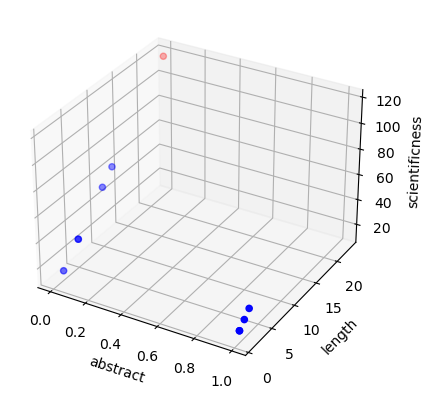

In [8]:
import matplotlib.pyplot as plt

colors = []
for e in y:
  if e > 75:
    colors.append('r')
  else:
    colors.append('b')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x[:,0], x[:,1], y,color=colors)

ax.set_xlabel('abstract')
ax.set_ylabel('length')
ax.set_zlabel('scientificness')

plt.show()

![4Perceptron_12_0](https://user-images.githubusercontent.com/7457301/223474136-84df1c7e-895a-4e13-8468-060802875974.png)